In [10]:
import os
import numpy as np
import SimpleITK as sitk
import matplotlib.pyplot as plt

In [11]:
def load_mhd(filename):
    with open(filename) as f:
        contents = f.readlines()
        line = [k for k in contents if k.startswith('TransformMatrix')][0]
        transformM = np.array(line.split(' = ')[1].split(' ')).astype('float')
        transformM = np.round(transformM)
        if np.any( transformM!=np.array([1,0,0, 0, 1, 0, 0, 0, 1])):
            isflip = True
        else:
            isflip = False

    itkimage = sitk.ReadImage(filename)
    numpyImage = sitk.GetArrayFromImage(itkimage)

    numpyOrigin = np.array(list(reversed(itkimage.GetOrigin())))
    numpySpacing = np.array(list(reversed(itkimage.GetSpacing())))

    return numpyImage, numpyOrigin, numpySpacing, isflip

# Show normal scan

000.mhd


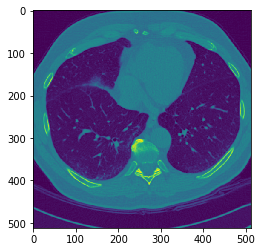

In [13]:
dirname = "/wmlce/data/medical-datasets/LUNA16/raw"
files = os.listdir(dirname)
flip = True
i = 0
while flip:
    if os.path.splitext(files[i])[1] == ".mhd":
        img, origing, spacing, flip = load_mhd(os.path.join(dirname, files[i]))
        if not flip:
            print(files[i])
            plt.imshow(img[80])
    i = i+1
plt.show()

# Show flipped scan

065.mhd


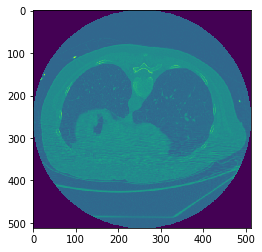

In [14]:
dirname = "/wmlce/data/medical-datasets/LUNA16/raw"
files = os.listdir(dirname)
flip = False
i = 0
while not flip:
    if os.path.splitext(files[i])[1] == ".mhd":
        img, origing, spacing, flip = load_mhd(os.path.join(dirname, files[i]))
        if flip:
            print(files[i])
            plt.imshow(img[80])
    i = i+1
plt.show()

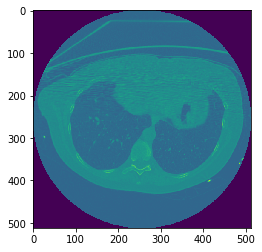

In [15]:
if flip:
    img = img[:,::-1,::-1]
    plt.imshow(img[80])
    plt.show()

087


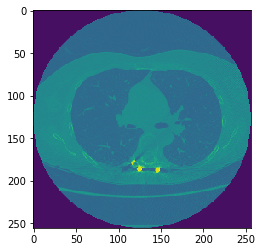

In [60]:
dirname = "output/preprocessing"
list_scans = np.load(os.path.join(dirname, "list_scans.npy"))
scan = list_scans[87]
print(scan)
img = np.load(os.path.join(dirname, scan + ".npy"))
plt.imshow(img[80])

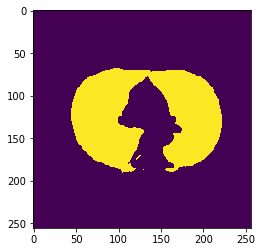

In [61]:
from predict import predict

mask = predict(img[np.newaxis, :], 1, 32, "output/training/model/model", threshold=True, erosion=False, verbose=True)
plt.imshow(mask[0][0][80])

Mask:
 -> shape: (1, 2, 128, 256, 256) 
unique: (array([0, 1, 2, 3], dtype=uint8), array([13352929,  2594495,   829789,        3]))


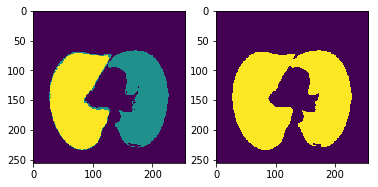

In [11]:
import os
import numpy as np
from data import utils
from predict import predict
import matplotlib.pyplot as plt
# Load scan
data = "/wmlce/data/medical-datasets/LIDC-IDRI/LIDC-IDRI-0807/1.3.6.1.4.1.14519.5.2.1.6279.6001.180089742036563526934101223693/1.3.6.1.4.1.14519.5.2.1.6279.6001.213854687290736562463866711534/LIDC-IDRI-0807_CT.nrrd"
_, scan_id = os.path.split(data)
scan_id = scan_id.split('.')[0]
ct_scan, origin, orig_spacing = utils.load_itk(data)
target_shape = np.array([128, 256, 256])
ct_scan, spacing = utils.prep_img_arr(ct_scan, orig_spacing, target_shape)

# Compute lungs mask
mask = predict(ct_scan, 2, 32, "output/training/2_128_256_256/model/model", threshold=True, erosion=False, verbose=True)

print("Mask:\n -> shape:", mask.shape, "\nunique:", np.unique(mask, return_counts=True))
_, axs = plt.subplots(1,2)
axs[0].imshow(mask[0][1][80])
axs[1].imshow(mask[0][0][80])